# Discritization 

Discretization – It is the process of transforming of  continuous variable into discreate variable by creating a set of contiguous interval that span the range of variable’s value . It is also called binning where the meaning of binning is interval 

### Why Discritization is important 

- Discritiztion help to descrase the value spread and also improve the skewed data .
- Discritization also handel the outliers by placing these value into lower and higher intervals with remaining values of the variables.

### <font colour="Red"> What are the method of Discritization</font>
- discritization method are categories under unsupervised and Supervised 
1. Unsupervised discritization methods are 
- Equal width discretization 
- Equal Frequency discritization
- K-means discritization
2. Supervised discritization methods are 
- Dicision Tree discretization 


## What is Equal width discritization 

- In Equal width discritization divide the value in N bins with equal width. The Width of the bins are calculated by range of the values  divided by number of bins (N)  

- `width = max_value-min_value/N , Where N= Number of bins user want'

- Example we have range of value 10 to 100 and i want to use 5 bins then the Width of bins will be  

- ` (100-10)/5 = 18 thus the bins will be 10-18, 18-36,36-54,54-72,72-90,90-108 `
- \\ First and Final bins can accomodate the lower and higher outliers.




In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
for dir_name,_,files_name in os.walk(r'C:\Users\Prashant Kumar Singh\Downloads\Study Materials\Python\Feature Engineering on 25th Jan 24\Multiple data set'):
    print(files_name)
    for file in files_name :
        list_of_file=os.path.join(dir_name,file)


['Housing.csv', 'loan.csv', 'README.md', 'titanic.xlsx']


In [3]:
df=pd.read_excel(list_of_file)

In [4]:
df.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,survived
0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0
1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1
3,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0


In [5]:
df1=df[['age','fare','survived']]

In [6]:
df1.isnull().sum()

age         177
fare          0
survived      0
dtype: int64

In [7]:
## Impute the missing value using mean 

df1['age']=df1['age'].fillna(np.mean(df1['age']))

C:\Users\Prashant Kumar Singh\AppData\Local\Temp\ipykernel_22132\3200051135.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['age']=df1['age'].fillna(np.mean(df1['age']))


In [8]:
df1['age'].isnull().sum()

0

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fare'}>]], dtype=object)

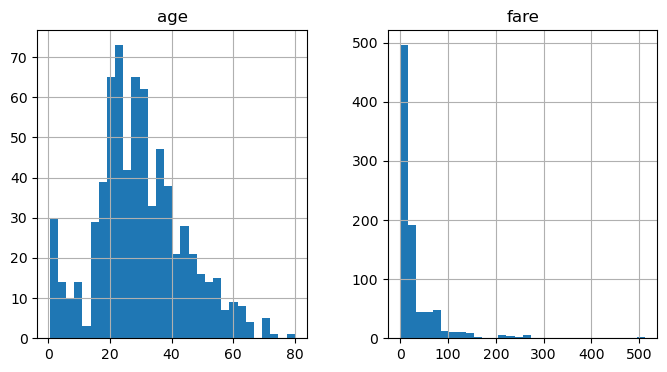

In [9]:
## let's explore the distributon of the age and fare

df[['age','fare']].hist(bins=30,figsize=(8,4))

# Equal Width Discritization 
N=8

In [10]:
label=['bins_'+str(i) for i in range(1,9)]

In [11]:
label

['bins_1',
 'bins_2',
 'bins_3',
 'bins_4',
 'bins_5',
 'bins_6',
 'bins_7',
 'bins_8']

In [12]:
## before discritization it is important to split the data into train and test but i am doing with all the data (df)

df1['age_label']=pd.cut(x=df1['age'],bins=8,retbins= False,
    precision = 3,include_lowest=True,labels=label)

C:\Users\Prashant Kumar Singh\AppData\Local\Temp\ipykernel_22132\4155844654.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['age_label']=pd.cut(x=df1['age'],bins=8,retbins= False,


In [13]:
df1['age_bins']=pd.cut(x=df1['age'],bins=8,retbins= False,
    precision = 0,include_lowest=True)

C:\Users\Prashant Kumar Singh\AppData\Local\Temp\ipykernel_22132\1491324187.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['age_bins']=pd.cut(x=df1['age'],bins=8,retbins= False,


In [14]:
df1

,age,fare,survived,age_label,age_bins
0,22.000000,7.2500,0,bins_3,"(20.0, 30.0]"
1,38.000000,71.2833,1,bins_4,"(30.0, 40.0]"
2,26.000000,7.9250,1,bins_3,"(20.0, 30.0]"
3,35.000000,53.1000,1,bins_4,"(30.0, 40.0]"
4,35.000000,8.0500,0,bins_4,"(30.0, 40.0]"
...,...,...,...,...,...
886,27.000000,13.0000,0,bins_3,"(20.0, 30.0]"
887,19.000000,30.0000,1,bins_2,"(10.0, 20.0]"
888,29.699118,23.4500,0,bins_3,"(20.0, 30.0]"
889,26.000000,30.0000,1,bins_3,"(20.0, 30.0]"


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '(-1.0, 10.0]'),
  Text(1, 0, '(10.0, 20.0]'),
  Text(2, 0, '(20.0, 30.0]'),
  Text(3, 0, '(30.0, 40.0]'),
  Text(4, 0, '(40.0, 50.0]'),
  Text(5, 0, '(50.0, 60.0]'),
  Text(6, 0, '(60.0, 70.0]'),
  Text(7, 0, '(70.0, 80.0]')])

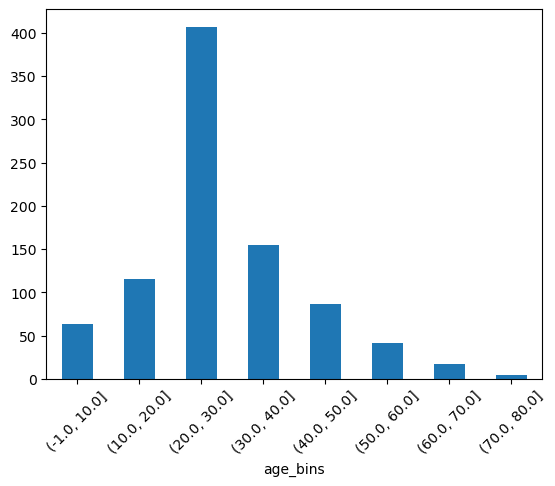

In [15]:
## let's plot to check which age group was more
import matplotlib.pyplot as plt
df1.groupby('age_bins')['age'].count().plot.bar()

plt.xticks(rotation=45)

# Thank you!